# GENERATE CONSOLIDATED TRAINING SET

    This Section focus on consolidating multiple training sets generated from simulator.
    Most of the training set ends with car running off-track and failed attempts to put car
    on track. will stich together all these trainings sets for larger data set. since the
    images as the end of these sets are kind of noise, will trim last 100 samples.

## Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Training Set Path

In [2]:
#   Training sets

dir_set = []
dir_set.append("./SimulatorTrainingData/fastest_training/")
dir_set.append("./SimulatorTrainingData/fastest_training_1/")
dir_set.append("./SimulatorTrainingData/fastest_training_2/")
dir_set.append("./SimulatorTrainingData/fastest_training_3/")
dir_set.append("./SimulatorTrainingData/fastest_training_4/")
dir_set.append("./SimulatorTrainingData/fastest_training_5/")
dir_set.append("./SimulatorTrainingData/fastest_training_6/")
    

## Read & Consolidate Training Sets

In [3]:
# --- Read Training sets ---

cdataset = []
for dir in dir_set:
    cdataset.append(
                    pd.read_csv(dir+"driving_log.csv",sep=',',names=['center','left','right','steering','throttle','brake','speed'])[:-100] # Skip last 100 samples
                    )
    

## Training Sets Summary

In [4]:
# --- Merge Training Sets to DataFrame ---

pddf = pd.concat(cdataset,axis=0)    # row bind
print(np.shape(pddf))
print(type(pd.concat(cdataset)))

pddf.to_csv('all_training.csv')

(33718, 7)
<class 'pandas.core.frame.DataFrame'>


In [68]:
pddf.head(10)

,center,left,right,steering,throttle,brake,speed
0,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000084
1,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000080
2,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000083
3,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000078
4,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000079
5,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000080
6,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000078
7,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000079
8,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000078
9,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning\...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,C:\Users\atchirc\SLAPG\SDC\BehaviouralCloning...,0.0,0.0,0,0.000078


# DATA PREPARATION

In [69]:
#  Extract Image file name
pddf['center'] = pddf['center'].str.replace(".*center","center")
pddf['left']   = pddf['left'].str.replace(".*left","left")
pddf['right']  = pddf['right'].str.replace(".*right","right")

In [70]:
pddf.head(10)

,center,left,right,steering,throttle,brake,speed
0,center_2017_01_31_11_28_52_609.jpg,left_2017_01_31_11_28_52_609.jpg,right_2017_01_31_11_28_52_609.jpg,0.0,0.0,0,0.000084
1,center_2017_01_31_11_28_52_707.jpg,left_2017_01_31_11_28_52_707.jpg,right_2017_01_31_11_28_52_707.jpg,0.0,0.0,0,0.000080
2,center_2017_01_31_11_28_52_811.jpg,left_2017_01_31_11_28_52_811.jpg,right_2017_01_31_11_28_52_811.jpg,0.0,0.0,0,0.000083
3,center_2017_01_31_11_28_52_914.jpg,left_2017_01_31_11_28_52_914.jpg,right_2017_01_31_11_28_52_914.jpg,0.0,0.0,0,0.000078
4,center_2017_01_31_11_28_53_017.jpg,left_2017_01_31_11_28_53_017.jpg,right_2017_01_31_11_28_53_017.jpg,0.0,0.0,0,0.000079
5,center_2017_01_31_11_28_53_418.jpg,left_2017_01_31_11_28_53_418.jpg,right_2017_01_31_11_28_53_418.jpg,0.0,0.0,0,0.000080
6,center_2017_01_31_11_28_53_523.jpg,left_2017_01_31_11_28_53_523.jpg,right_2017_01_31_11_28_53_523.jpg,0.0,0.0,0,0.000078
7,center_2017_01_31_11_28_53_626.jpg,left_2017_01_31_11_28_53_626.jpg,right_2017_01_31_11_28_53_626.jpg,0.0,0.0,0,0.000079
8,center_2017_01_31_11_28_53_733.jpg,left_2017_01_31_11_28_53_733.jpg,right_2017_01_31_11_28_53_733.jpg,0.0,0.0,0,0.000078
9,center_2017_01_31_11_28_53_843.jpg,left_2017_01_31_11_28_53_843.jpg,right_2017_01_31_11_28_53_843.jpg,0.0,0.0,0,0.000078


##  Exploratory Analysis

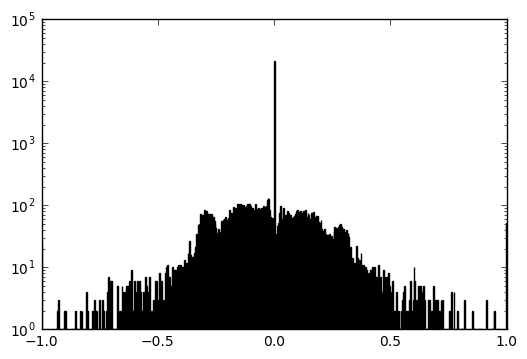

In [71]:
# --- Steering Angle Distribution ---
fig = plt.hist(pddf['steering'],bins=500)
plt.yscale('log')

pddf['steering'].value_counts()

## Prune Zero Steering Angle Data

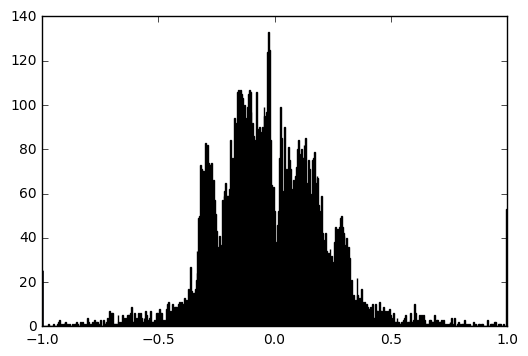

In [72]:
# --- Prune Zero Steering Angle Data ---

pddf = pddf.loc[pddf['steering']!=0.0]

fig = plt.hist(pddf['steering'],bins=500)


In [73]:
# --- Filter Only center Camera Images and Steering Angle ---

pddf = pddf[['center','steering']]

pddf.head(10)
np.shape(pddf)

(12229, 2)

# DATA AUGMENTATION

## Flip Images

In [74]:
# Make a copy of Flip DataFrame
pddf_flip = pddf.copy()

pddf_flip['center'] = pddf['center'].str.replace('center_','center_flip_')    # insert flip to image name
pddf_flip['steering'] = pddf_flip['steering']*-1                              # steering angle * -1
#pddf_flip.head(10);
pddf.head(10)

,center,steering
35,center_2017_01_31_11_28_56_583.jpg,-0.290997
37,center_2017_01_31_11_28_56_792.jpg,-0.195954
40,center_2017_01_31_11_28_57_117.jpg,-0.284908
41,center_2017_01_31_11_28_57_222.jpg,-0.200302
42,center_2017_01_31_11_28_57_329.jpg,-0.548699
43,center_2017_01_31_11_28_57_430.jpg,-0.852315
44,center_2017_01_31_11_28_57_536.jpg,-0.535094
45,center_2017_01_31_11_28_57_644.jpg,-0.236721
46,center_2017_01_31_11_28_57_750.jpg,-0.130423
50,center_2017_01_31_11_28_58_159.jpg,-0.077681


In [75]:
pddf_flip.head(10)

,center,steering
35,center_flip_2017_01_31_11_28_56_583.jpg,0.290997
37,center_flip_2017_01_31_11_28_56_792.jpg,0.195954
40,center_flip_2017_01_31_11_28_57_117.jpg,0.284908
41,center_flip_2017_01_31_11_28_57_222.jpg,0.200302
42,center_flip_2017_01_31_11_28_57_329.jpg,0.548699
43,center_flip_2017_01_31_11_28_57_430.jpg,0.852315
44,center_flip_2017_01_31_11_28_57_536.jpg,0.535094
45,center_flip_2017_01_31_11_28_57_644.jpg,0.236721
46,center_flip_2017_01_31_11_28_57_750.jpg,0.130423
50,center_flip_2017_01_31_11_28_58_159.jpg,0.077681


In [76]:
# Flip and save Image Center Camera Images

training_dir = './SimulatorTrainingData/all_training/'

def flip_save(img_path):
    global training_dir ;        # Training data directory
    plt.imsave(
                training_dir+img_path.replace('center_','center_flip_'),   # Flip File Name
                np.fliplr(plt.imread(training_dir+img_path)),              # Flip np array
                format='jpg'
                )
    
for img_path in pddf['center'].values:
    flip_save(img_path)

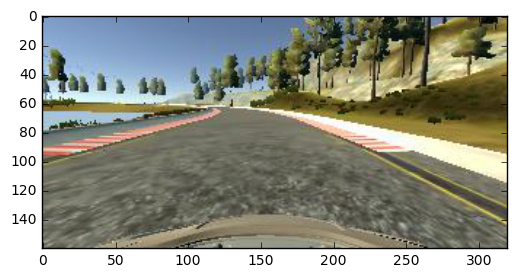

In [77]:
plt.imshow(plt.imread(training_dir+pddf['center'].values[100]))

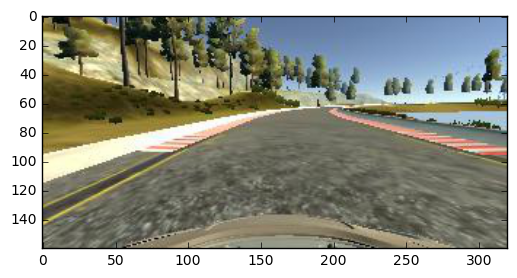

In [78]:
plt.imshow(plt.imread(training_dir+pddf_flip['center'].values[100]))

# TRAINING SET PREPARATION

## Merge Acutal and Flipped Images

In [79]:
train = pd.concat([pddf, pddf_flip])

## Analize Merged Data Steering Angle

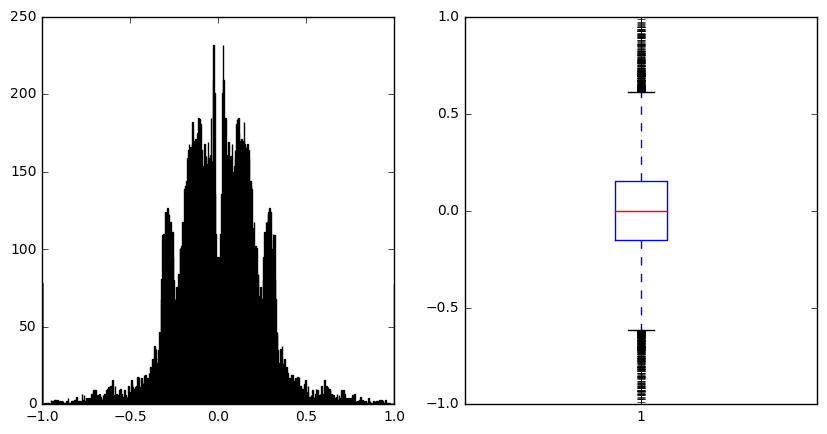

In [80]:
canvas = plt.figure(figsize=(10,5))

steer_hist = canvas.add_subplot(1,2,1)
fig = steer_hist.hist(train['steering'],bins=500)

steer_boxplot = canvas.add_subplot(1,2,2)
fig = steer_boxplot.boxplot(train['steering'].values)

## Outlier Treatment

In [81]:
# Outlier Treatment

# Prune steering angle values > 0.6

train = train.loc[train['steering']<=0.6]
train = train.loc[train['steering']>=-0.6]


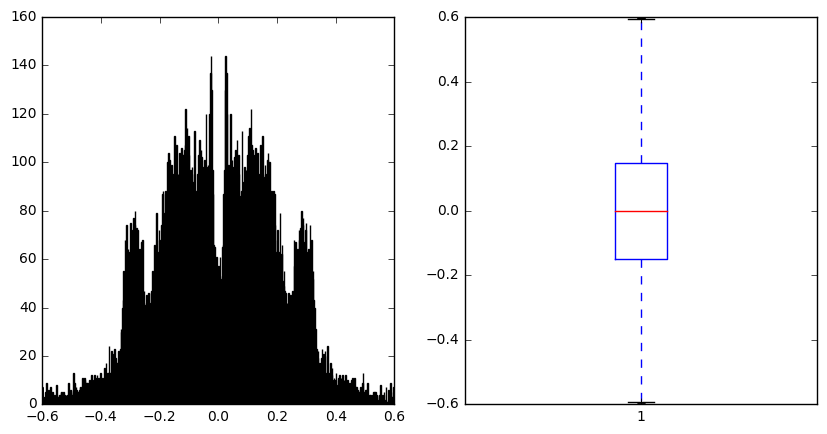

In [82]:
canvas = plt.figure(figsize=(10,5))

steer_hist = canvas.add_subplot(1,2,1)
fig = steer_hist.hist(train['steering'],bins=500)

steer_boxplot = canvas.add_subplot(1,2,2)
fig = steer_boxplot.boxplot(train['steering'].values)

# CREATE TRAIN, VALIDATION & TEST DATA

In [83]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

##  Split Data set

In [84]:

# Create Test Set
X_train, X_test, y_train, y_test = train_test_split(train['center'], train['steering'], test_size=0.2, random_state=100)

# Create Train & Validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=100)

# --- Summary ----
# X_train --> Training set
# X_valid --> Validation set
# X_test  --> Test set



## Load Images

In [85]:

# Load Images

read_image = lambda x : plt.imread(training_dir+x)

X_train_image = np.asarray(list(map(read_image, X_train)))    # Training Images
X_valid_image = np.asarray(list(map(read_image, X_valid)))    # Validation Images
X_test_image  = np.asarray(list(map(read_image, X_test)))     # Test Images


In [90]:

y_train = np.asarray(y_train)
y_valid = np.asarray(y_valid)
y_test  = np.asarray(y_test)

# SAVING DATA IN PICKLE FORMAT

In [92]:
import pickle
import os

# --- save to pickle file ----

pickle_file = training_dir+"data"+".pickle"
print(pickle_file)

if not os.path.isfile(pickle_file):
    print('Saving preprocessed data to pickle file...')
    try:
        with open(pickle_file, 'wb') as pfile:
            pickle.dump(
                {
                    'train_dataset': X_train_image,
                    'train_labels': y_train,
                    'valid_dataset': X_valid_image,
                    'valid_labels': y_valid,
                    'test_dataset': X_test_image,
                    'test_labels': y_test,
                },
                pfile, pickle.HIGHEST_PROTOCOL)
    except Exception as e:
        print('Unable to save data to', pickle_file, ':', e)
        raise

print('Data cached in pickle file.')


./SimulatorTrainingData/all_training/data.pickle
Saving preprocessed data to pickle file...
Data cached in pickle file.


In [87]:
print(np.shape(X_train_image))
print(np.shape(X_valid_image))
print(np.shape(X_test_image))

(16109, 160, 320, 3)
(2843, 160, 320, 3)
(4738, 160, 320, 3)


In [89]:
print(np.asarray(y_train)[0])

0.1624865
